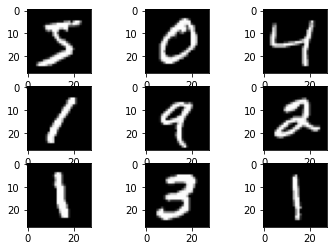

(60000, 28, 28, 1) (60000, 10)


In [ ]:
from matplotlib.cm import get_cmap
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = x_train
Xt = x_test
# show hinh anh mnist
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap= get_cmap('gray'))
plt.show()

# ep kieu va dua ve mau xam
x_train = x_train.reshape(60000, 28, 28 ,1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(x_train.shape, y_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers.pooling import MaxPooling2D

# khoi tao model
model = Sequential()
# CNN
model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

#ANN train
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'softmax'))
model.summary()
#compile model
model.compile(optimizer= SGD(), loss = 'categorical_crossentropy', metrics = 'accuracy')
history = model.fit(x_train, y_train, batch_size  50, epochs= 10, verbose= 1, validation_data= (x_test, y_test)) 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

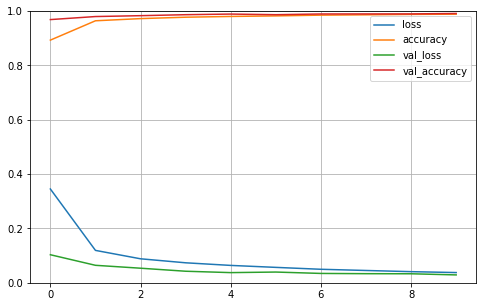

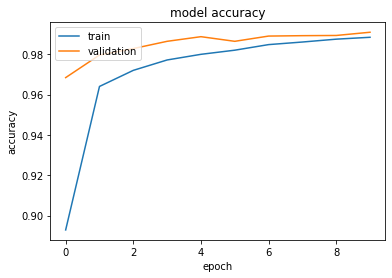

In [ ]:
# ve do thi
import pandas as pd
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Numerical of mnist datasets label: 100


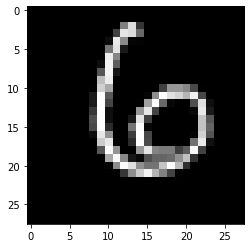

this is number six

    Do you want to continues!?
    Type Yes or No: 
    y
Numerical of mnist datasets label: 0


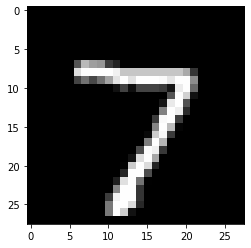

this is number seven

    Do you want to continues!?
    Type Yes or No: 
    y
Numerical of mnist datasets label: 2


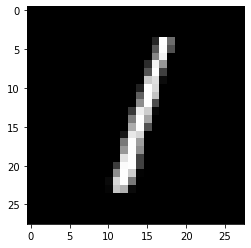

this is number one

    Do you want to continues!?
    Type Yes or No: 
    n
Bye


In [ ]:
from keras.utils.tf_utils import type_spec_from_value
# predict
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
score = model.evaluate(x_test, y_test, verbose=0)
lbl = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine']
while(True):

  num = int(input("Numerical of mnist datasets label: "))
  pred = x_test[num]
  plt.imshow(Xt[num], cmap = get_cmap('gray'))
  plt.show()
  pred = pred.reshape(1,28,28,1)
  y_pred = model.predict([pred])
  for i in range(9):
    if i == int(np.argmax(y_pred, axis= 1)):
      print(f'this is number {lbl[i]}')
  while(True):
    question = str(input(
    """
    Do you want to continues!?
    Type Yes or No: 
    """))
    if question == 'Yes'or question =='y' or question == 'Y':
      Continues = 1
      break
    elif question == 'No' or question =='n'or question =='N':
      Continues = 0
      print('Bye')
      break
    else:
      print("Please type 'Yes' or 'No'")
  if Continues == 1:
    continue
  else:
    break